[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/Exerc%C3%ADcio_Computacional_V.ipynb)

### Bloco de código com importações de bibliotecas necessárias

In [0]:
#importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
# Lasso
from sklearn.linear_model import Lasso
# ElasticNet
from sklearn.linear_model import ElasticNet
#LinearRegression
from sklearn.linear_model import LinearRegression


### Bloco de código com métodos para tratar os dados

In [0]:
# [off-topic] - Bloco de código com métodos para tratar os dados

# Função para contar as ocorrências de um 
# determinado elemento em um vector
def count_events(vector):  
  out = {}
  
  for x in set(vector):
    out[x] = vector.count(x)
  
  return out

# Função para criar indices para elementos não 
# numerais de um vetor
def create_idx(vector):  
  out = {}
  
  idx = 0
  for x in set(vector):
    out[x] = idx
    idx += 1
  
  return out

#divide o conjuto de dados em treinamento e testes - EC I
def split_train_test(X,y, train_ratio):
    n = len(X)
    
    idx_end_test = np.int(np.round(n*train_ratio))
        
    X_train = X[0:idx_end_test, ]
    y_train = y[0:idx_end_test]
    
    X_test = X[idx_end_test+1:, ]
    y_test = y[idx_end_test+1:]
    
    
    return (X_train, y_train, X_test, y_test)


###Bloco de código para importação e preparo dos dados

In [0]:
##importando base de dados

## Base de dados Abalone
dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)

## Base de dados Automobile Data Set
#dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)

## Base de dados Wine
#data = dt.load_boston(); dados = np.c_[data.data, data.target]

## Base de dados Diabetes
#data = dt.load_diabetes(); dados = np.c_[data.data, data.target]


dados = np.array(dados)

n, d = dados.shape

idx_remove = []
#loop para remover ocorrências de '?'
for j in range(n):
  if '?' in str(dados[j]):
     idx_remove.append(j)

dados = np.delete(dados, idx_remove, 0)      
      
for i in range(d):  
  #se os dados não forem do tipo int ou float, crio um indice para eles
  if type(dados[0,i]) is str:
       
    idx_ = create_idx(dados[:,i])
   
    for k,v in idx_.items():
      dados[np.where(dados[:, i] == k)[0], i] = v
      
y = dados[:,-1]
X = dados[:,0:-1]

# Extreme Learning Machine (ELM) 

Um algoritmo de aprendizado simples e eficiente para redes neurais *feed-forward* de camada única (SLFNs) chamado *Extreme Learning Machine* (ELM) foi recentemente proposto por Huang *et al*. O ELM tem sido aplicado com sucesso em diversas aplicações do mundo real, mostrando um bom desempenho de generalização com uma
velocidade de aprendizagem extremamente rápida.

A aplicação mais importante das redes ELM é como obter a arquitetura mais apropriada para um determinado problema. O método usual de escolha desse arranjo, o número de neurônios na camada escondida da rede, é estimar o erro de generalização para vários modelos, e depois selecionar aquele que apresentou o menor valor. Todavia, esse processo por ser demorado e custoso, principalmente quando os dados apresentam alta dimensionalidade e um grande número de observações.

## Metódos

Dado um conjuto de dados **$D = (X_i, o_i)$** ; $i = 1, ... , N$, onde $N$ é o número de amostras desse conjunto e ${o_i}$ são os valores de resposta para padrão de entrada do vetor **${X_i}$** , e em uma arquitetura com $M$ neurônios na camada escondida, temos que o valor de saída *i*-ésimo elemento de entrada da rede é dado por:

\begin{equation}
y_i = \sum_{k=1}^M h_k * f(w_k, x_i)
\end{equation}

$w_k$ é o k-ésimo valor do parâmetro que cone cta a camada de entrada com a camada oculta (pesos e bias), $h_k$ é o é o k-ésimo valor do parâmetro que liga a camada de saída com a camada oculta, $f$ é a função que fornece a saída da camada oculta. No caso de uma MLP $f$ é o produto escalar entre os pesos da camada escondida e o vetor de entrada.

A saída da rede pode ser respresentado matricialmente como $y = G* h$, onde $h$ é o vetor de pesos de conexão entre a camada oculta e a de saída e $G$ é dado por:

\begin{equation}
G = \left(
  \begin{array}{ccc}
    f(w_1, x_1 ) & ... & f(w_M, x_1 ) \\
    ... & ... & ... \\
    f(w_1, x_N ) & ... & f(w_M, x_N ) \\
  \end{array}
\right)
\end{equation}

O ELM propõe uma inicialização aleatório para os valores de peso que ligam a camada de entrada com a camada oculta.







In [0]:
# Particiona-se os dados em conjuntos de teste e treinamento
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.8)

#recupera a dimensao da matriz de entrada 
n, d = X_train.shape

#inicializa aleatoriamente o vetor de pesos w
w = np.random.normal(0,1, [1,d])

#gera a matriz G
G = X_train * w

## Regularização ELM

A principal ideia do método é inditificar o grau de relevância do peso do k-ésimo elemento conectado a camada de saída utilizando métodos de regularização. A priori defini-se uma arquitetura de rede superdimensionada com **$M$** neurônios na camada escondida. Uma prática que pode ser adotada é definir o valor de **$M$** igual ao número de amostras da matriz de entrada da rede. Conforme dito anteriormente, a metodologia ELM define os valores do pesos associado a estes neurônios de forma aleatória.

#### *Lasso, ridge regression* e a *elastic net*

A regressão linear múltipla é frequentemente utilizada para estimar modelos de predição, ou para investigar a relação entre uma variável resposta e as variáveis preditoras. Para o primeiro objetivo a acurácia do método é importante enquanto para o segundo, o tamanho do modelo é mais interessante.

O método de regressão de mínimos quadrados ordinários (do inglês, Ordinary Least Squares - OLS) é conhecida por muitas vezes não ter um bom desempenho com relação à precisão de predição e ao tamanho do modelo. Diversos métodos de regressão regularizados foram desenvolvidos nas últimas décadas para superar essas falhas, começando com a *ridge regression*, seguido pelo método *lasso* e, mais recentemente, pela *elastic net*.

*Ridge regression* e *lasso* são versões do método de regressão dos mínimos que utilizam penalidades sobre o vetor de pesos. No ano de 2005, Zou *et al* propuseram o metódo *elastic net* que cria um compromisso entre o *ridge regression* e o método *lasso*.

Vamos considerar um modelo de regressão com apenas uma saída, para simplificar o entedimento do metódo. Para uma variável de resposta $y \in R$ e um vetor de predição $s \in R^Q$, aproximamos a função de regressão pelo modelo linear $E(y|s) = \beta_0  + s^T*\beta$, onde s são as linhas da matriz $G$ e $[\beta_0 \beta]$ é o vetor $h$, mostrado anteriormente.

No *ridge regession* minizamos sobre $\beta$ a seguinte função objetivo:

\begin{equation}
J = \sum_{i=1}^{N} (y_i - \beta_0 - s_i ^T \beta)^2 + \lambda \sum_{j=1}^{Q} \beta_j ^2
\end{equation}







Erro estimado pelo modelo: 4


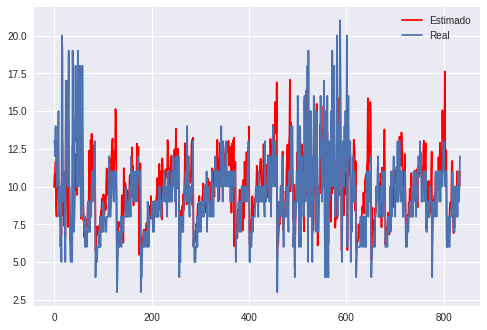

In [62]:
#instancia o objeto da classe
linearModel = LinearRegression(normalize=True)

#predita o modelo
model = linearModel.fit(G, y_train)

#valores de Beta
h = model.coef_
b0 = model.intercept_

#entrada para a validação do modelo
G_test = X_test * w

#calcula a saída da rede
y_hat = np.dot(G_test , h) + b0

#plota os valores reais e estimados
plt.plot(y_hat, 'r-', label="Estimado")
plt.plot(y_test, '-', label="Real")
plt.legend(loc='best')

from sklearn.metrics import mean_squared_error

print("Erro estimado pelo modelo: %d" % mean_squared_error(y_test, y_hat))


O método *Lasso* modifica o critério mostrado anteriormente:

\begin{equation}
J = \sum_{i=1}^{N} (y_i - \beta_0 - s_i ^T \beta)^2 + \lambda \sum_{j=1}^{Q} |\beta_j|
\end{equation}

O *lasso* substitui a penalidade $\beta^2$ pela penalidade $|\beta|$. A vantagem é que assim é possível achar soluções mais esparsas. 

Erro estimado pelo modelo: 5


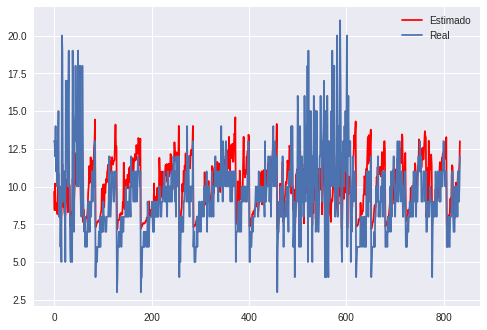

In [63]:
#instancia o objeto da classe
alpha = .1
lasso = Lasso(alpha=alpha)

#predita o modelo
model = lasso.fit(G, y_train)

#valores de Beta
h = model.coef_
b0 = model.intercept_

#entrada para a validação do modelo
G_test = X_test * w

#calcula a saída da rede
y_hat = np.dot(G_test , h) + b0

#plota os valores reais e estimados
plt.plot(y_hat, 'r-', label="Estimado")
plt.plot(y_test, '-', label="Real")
plt.legend(loc='best')

from sklearn.metrics import mean_squared_error

print("Erro estimado pelo modelo: %d" % mean_squared_error(y_test, y_hat))

A regressão *elastic net* aplica uma penalida na forma de $\lambda_1  || \beta || + \lambda_2 ||\beta|| ^2$, onde o primeiro termo corresponde ao *lasso* e o segundo termo correponde a penalidade do *ridge regression*.

Erro estimado pelo modelo: 4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


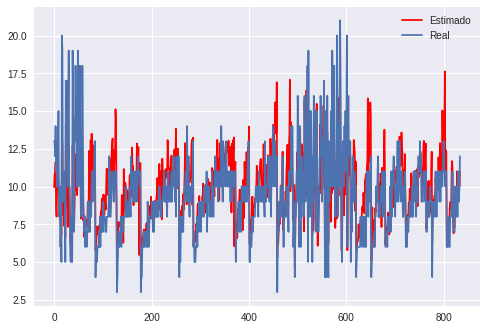

In [64]:
#instancia o objeto da classe
alpha = .0000001
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

#predita o modelo
model = enet.fit(G, y_train)

#valores de Beta
h = model.coef_
b0 = model.intercept_

#entrada para a validação do modelo
G_test = X_test * w

#calcula a saída da rede
y_hat = np.dot(G_test , h) + b0

#plota os valores reais e estimados
plt.plot(y_hat, 'r-', label="Estimado")
plt.plot(y_test, '-', label="Real")
plt.legend(loc='best')

from sklearn.metrics import mean_squared_error

print("Erro estimado pelo modelo: %d" % mean_squared_error(y_test, y_hat))

Os três métodos de regularização para modelos lineares podem ser descritos de forma generalizada:

\begin{equation}
\min_{(\beta_0, \beta) \in R^Q} [ \frac{1}{2N}  \sum_{i=1}^{N} (y_i - \beta_0 - s_i ^T \beta)^2 + \lambda P_\alpha (\beta)]
\end{equation}

onde

\begin{equation}
P_\alpha (\beta) = \sum_{i=1}^{Q}[\frac{1}{2}(1-\alpha) \beta_j ^2 + \alpha (\beta) ]
\end{equation}

No *elastic net* a penalidade $P\alpha$ é um *trade-off* entre a penalidade *ridge
regression* ($\alpha = 0$) e a penalidade *lasso* ($\alpha = 1$)
